In [2]:
import pandas as pd
from preprocess import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Q1: How does the out-of-sample risk changes for different shrinkage coefficients?

model
0.6    0.015476
0.5    0.015593
0.7    0.015750
0.4    0.016125
0.8    0.016590
0.3    0.017296
0.9    0.018795
0.2    0.019843
0.1    0.026826
1.0    0.175449
Name: value, dtype: float64


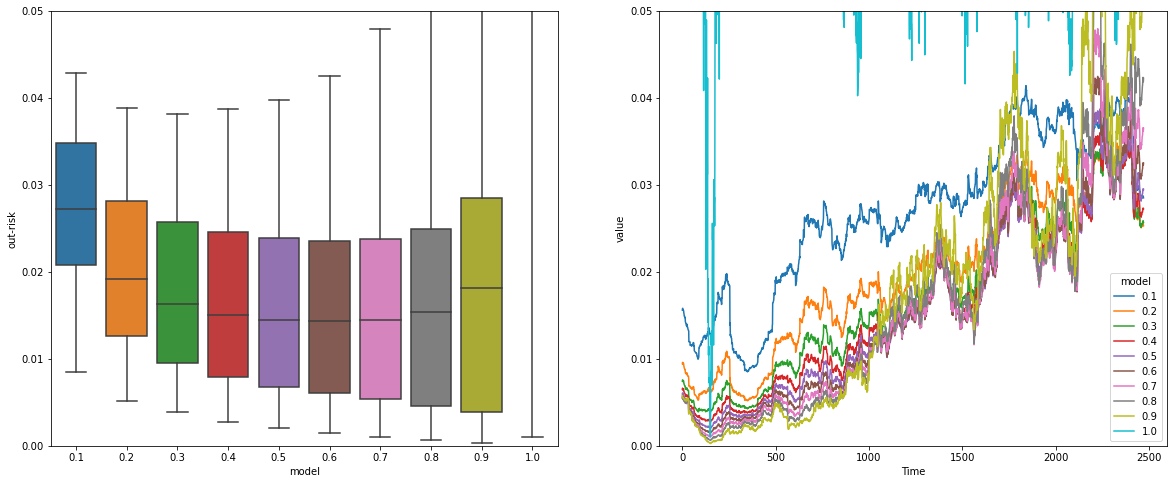

In [5]:

result_dict = load_pickle("results/q4.pkl")
new_keys = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
result_dict = {k: v for k,v in zip(new_keys, result_dict.values())}
#melting the dataframe, model is the column name, value is the value of the column, time is the time
df= pd.DataFrame(result_dict)
df["time"] = df.index
df_melted = pd.melt(df, var_name='model', value_name='value', id_vars=['time'])


fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.boxplot(data=df_melted, x="model", y="value", hue="model", ax=ax[0], dodge=False, palette="tab10")#ci=99)#
ax[0].set(ylim=[0,0.05], ylabel="out-risk")
ax[0].legend_.remove()


sns.lineplot(data=df_melted, x="time", y="value", ax=ax[1], hue="model", palette="tab10")
ax[1].set(ylim=[0,0.05], xlabel="Time")
print(df_melted.groupby("model").mean().sort_values(by="value")["value"])
#save plot as pdf
fig.savefig('plots/q4.pdf')

# Q2: Does higher order clustering and bootsrapping improve HALC?

model
1     0.010883
5     0.013214
10    0.015421
15    0.016851
20    0.017922
25    0.018772
30    0.019459
35    0.020041
40    0.020544
45    0.021071
50    0.021554
Name: value, dtype: float64


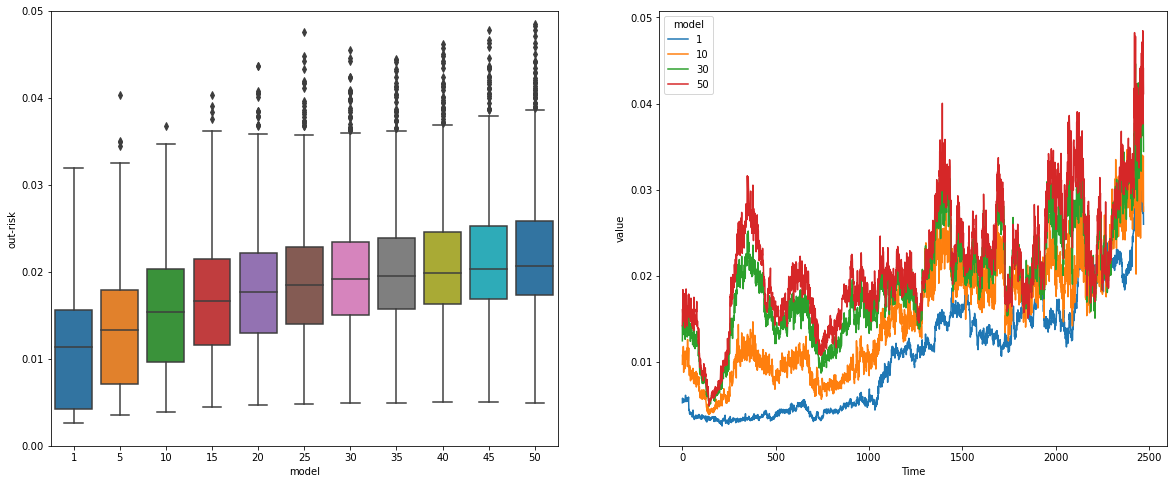

In [4]:

result_dict = load_pickle("results/q5.pkl")
df= pd.DataFrame(result_dict)
df["time"] = df.index
#melting the dataframe, model is the column name, value is the value of the column, time is the time
df_melted = pd.melt(df, var_name='model', value_name='value', id_vars=['time'])

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.boxplot(data=df_melted, x="model", y="value", hue="model", ax=ax[0], dodge=False, palette="tab10")#ci=99)#
ax[0].set(ylim=[0,0.05], ylabel="out-risk")
ax[0].legend_.remove()

sns.lineplot(data=df_melted[df_melted["model"].isin([1,10,30,50])], x="time", y="value", ax=ax[1], hue="model", palette="tab10")
ax[1].set(xlabel="Time")
print(df_melted.groupby("model").mean().sort_values(by="value")["value"])
#save plot as pdf
fig.savefig('plots/q5.pdf')


# Q3: How does the reliability change in RMT for different cut-off values?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


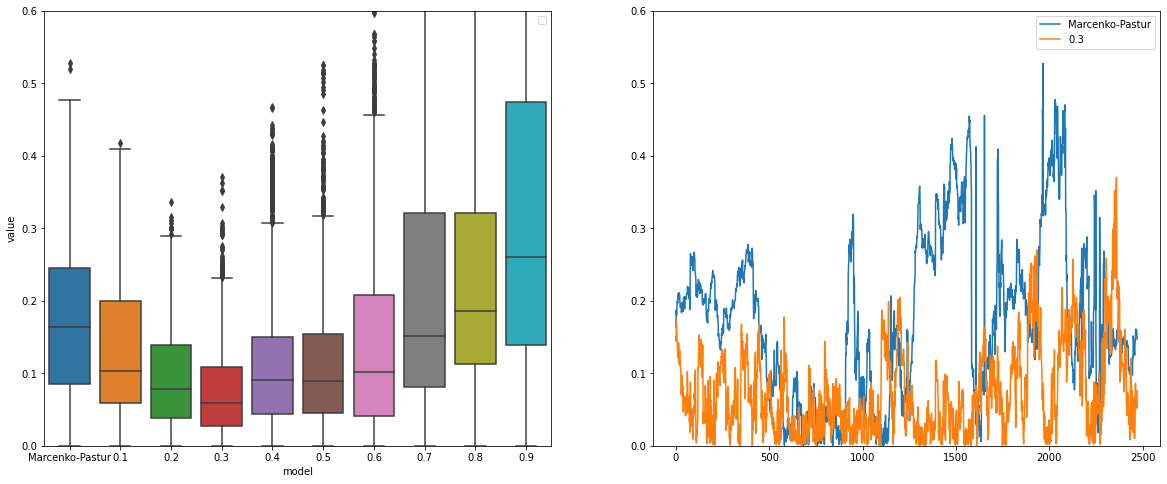

In [9]:
result_dict = load_pickle("results/q2.pkl")
df= pd.DataFrame(result_dict)

df_melted = df.melt(id_vars=None, value_vars=list(df.columns), var_name="model", value_name="value")
df_melted = df_melted[["model", "value"]]

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.boxplot(data=df_melted, x="model", y="value", ax=ax[0], dodge=False)#ci=99)#
ax[0].set(ylim=[0,0.6])
ax[0].legend()

df[["Marcenko-Pastur", 0.3]].plot(ylim=[0, 0.6], ax=ax[1])
plt.savefig('plots/q2-clippings.pdf')

# Q4: How does the out-of-sample risk and Neff evolve for different covariance estimates?

In [ ]:
res = pd.read_csv("results/q1_average.csv")
res2 = pd.read_csv("results/q1_rtm.csv")
res3 = pd.read_csv("results/q1_empirical.csv")
res4 = pd.read_csv("results/q1_linear.csv")
res5 = pd.read_csv("results/q1_bahc.csv")
res6 = pd.read_csv("results/q1_rie.csv")

res["model"] = "Clustering" 
res2["model"] = "RMT"
res3["model"] = "Empirical"
res4["model"] = "Linear"
res5["model"] = "BAHC"
res6["model"] = "RIE"

res.bfill(inplace=True)
res2.bfill(inplace=True)
res3.bfill(inplace=True)
res4.bfill(inplace=True)
res5.bfill(inplace=True)
res6.bfill(inplace=True)

res["n_effs_rolling"] = res["neffs"].rolling(10, min_periods=1).mean()
res2["n_effs_rolling"] = res2["neffs"].rolling(10, min_periods=1).mean()
res3["n_effs_rolling"] = res3["neffs"].rolling(10, min_periods=1).mean()
res4["n_effs_rolling"] = res4["neffs"].rolling(10, min_periods=1).mean()
res5["n_effs_rolling"] = res5["neffs"].rolling(10, min_periods=1).mean()
res6["n_effs_rolling"] = res6["neffs"].rolling(10, min_periods=1).mean()

res["out_risk_rolling"] = res["out_risk"].rolling(10, min_periods=1).mean()
res2["out_risk_rolling"] = res2["out_risk"].rolling(10, min_periods=1).mean()
res3["out_risk_rolling"] = res3["out_risk"].rolling(10, min_periods=1).mean()
res4["out_risk_rolling"] = res4["out_risk"].rolling(10, min_periods=1).mean()
res5["out_risk_rolling"] = res5["out_risk"].rolling(10, min_periods=1).mean()
res6["out_risk_rolling"] = res6["out_risk"].rolling(10, min_periods=1).mean()

df = pd.read_csv("data/nasdaq_raw_2010_2020.csv")
df = preprocess_df(df)

res["date"] = df.iloc[:-252].index
res["date"] = pd.to_datetime(res["date"])
res2["date"] = pd.to_datetime(res["date"])
res3["date"] = pd.to_datetime(res["date"])
res4["date"] = pd.to_datetime(res["date"])
res5["date"] = pd.to_datetime(res["date"])
res6["date"] = pd.to_datetime(res["date"])


df = pd.concat([res, res2, res3, res4, res5, res6])
df["reliability"] = abs(df["reliability"])
df.index = np.arange(6*2520)

In [4]:
df.groupby("model").sum()["runtime"]

model
BAHC          27648.644731
Clustering     2510.652023
Empirical      2939.827342
Linear         2249.348738
RIE           39857.749023
RMT           43156.202315
Name: runtime, dtype: float64

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df[["neffs", "out_risk", "reliability", "runtime", "model"]].groupby("model").mean()

,neffs,out_risk,reliability,runtime
model,,,,
BAHC,215.081015,5.358338e-03,4.939162e-01,10.971684
Clustering,303.643692,7.103630e-03,4.661621e+00,0.996290
Empirical,156.768197,4.250804e-02,1.678958e-16,1.166598
Linear,561.333823,1.005669e-02,9.525025e-01,0.892599
RIE,5.624775,7.944857e+06,4.345665e+09,15.816567
RMT,549.457619,9.352723e-03,1.963046e+00,17.125477


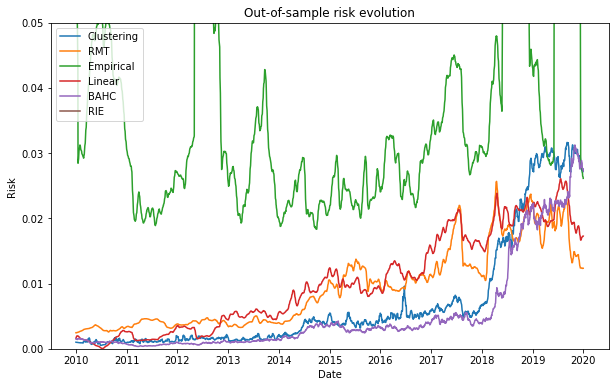

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.lineplot(data=df, x="date", y="out_risk_rolling", hue="model", ax=ax)
ax.set(xlabel="Date", ylabel="Risk", title="Out-of-sample risk evolution", ylim=[0,0.05])
ax.legend(loc='upper left')
plt.savefig('plots/q1-out-risk.pdf')
plt.savefig('plots/q1-out-risk.png')

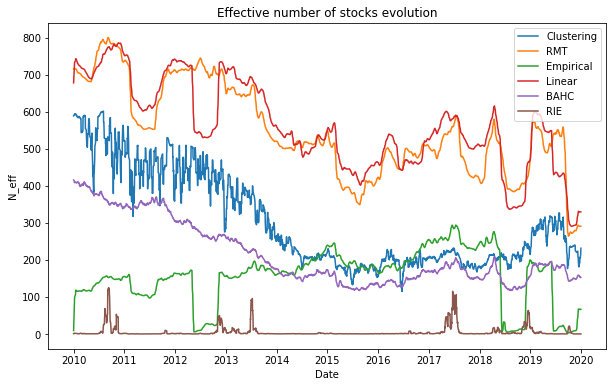

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.lineplot(data=df, x="date",y="n_effs_rolling", hue="model", ax=ax)
ax.set(xlabel="Date", ylabel="N_eff", title="Effective number of stocks evolution")
ax.legend(loc='upper right')
plt.savefig('plots/q1-effective.pdf')
plt.savefig('plots/q1-effective.png')

# Q5: How does the reliability of RMT and HALC changes in the function of T and N ? 

<Figure size 432x288 with 0 Axes>

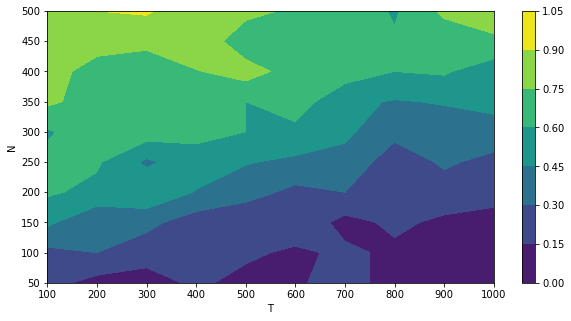

In [8]:
result_dict = load_pickle("results/q3.pkl")
max_T=1000
max_N=500
perc = lambda x,y: result_dict.get((x,y), np.NaN)
v_func = np.vectorize(perc)   

Ts = np.linspace(0,max_T, 11)[1:]
Ns = np.linspace(0, max_N, 11)[1:]
X,Y= np.meshgrid(Ts, Ns)

Z = v_func(X,Y).T

plt.figure()
fig, ax = plt.subplots(1,1, figsize=(10,5))
CS = ax.contourf(X,Y,Z, vmin=0, vmax=1)
ax.set(xlabel="T", ylabel="N")
fig.colorbar(CS)
plt.savefig('plots/q3-contour.pdf')

# Clustering visualization

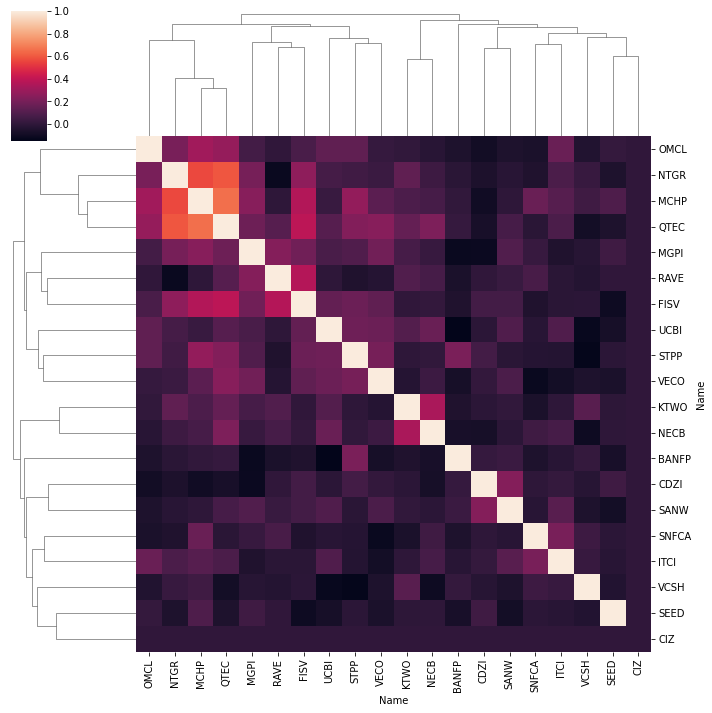

In [41]:
df = pd.read_csv("data/nasdaq_raw_2010_2020.csv")
df = preprocess_df(df)

T=100
t0 = 1000
sample = 20

corr = df.sample(sample, axis=1)[t0:t0 + T].corr().fillna(0)
sns.color_palette("viridis", as_cmap=True)
fig = sns.clustermap(corr, method='average', figsize=(10,10))
plt.savefig('plots/clustering.pdf')